In [1]:
#Aluno: João Pedro de Rossi Tambasco Calazans
#Matrícula: 202010405

#Importando as libs que serão utilizadas no exercício:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import scipy


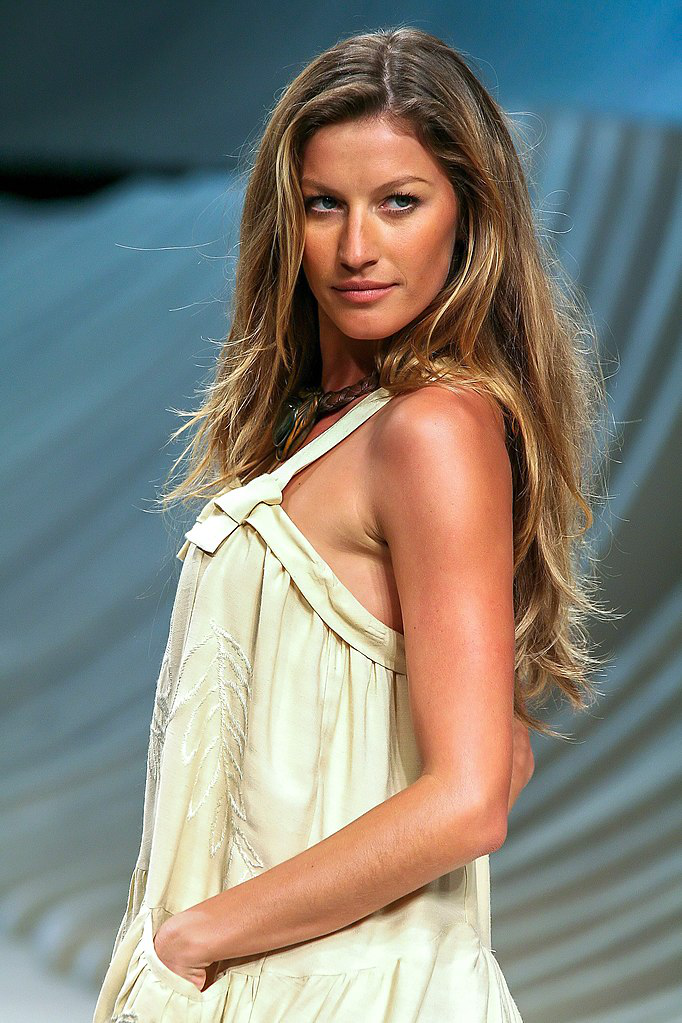

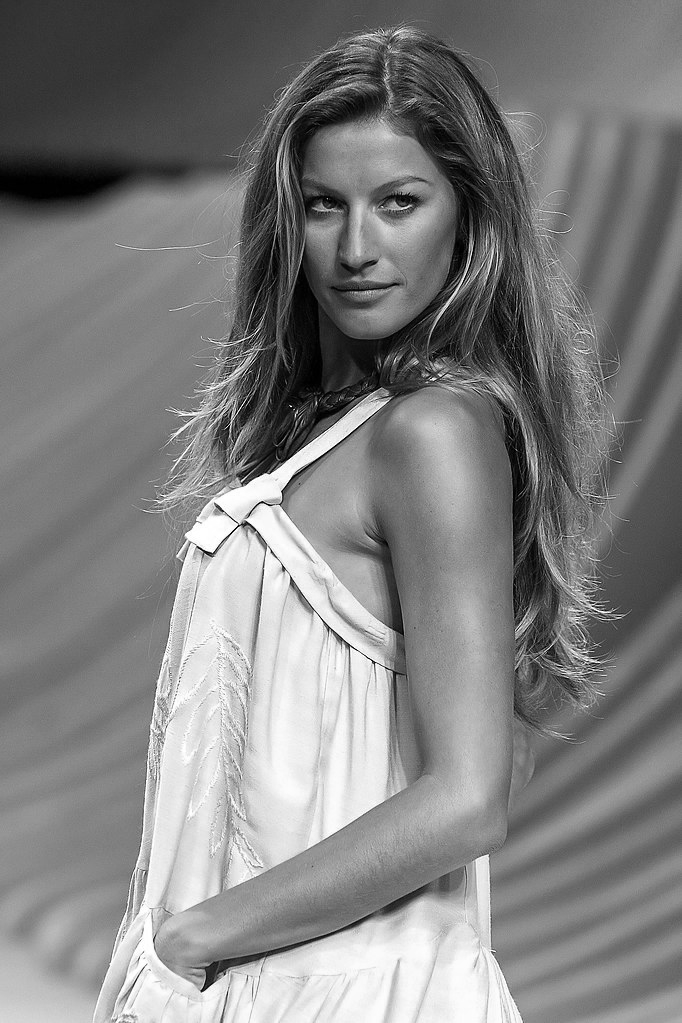

In [23]:
# Exercício 1 - Desenvolva um código que lhe permita abrir uma imagem RGB ou BGR de sua preferência, utilizando a interface python do OpenCV.
# Logo depois, converta a imagem para escala de cinza e exiba as duas imagens lado a lado na tela. Documente as funções utilizadas no código.

#Carregando a Imagem RGB que será trabalhada:
imagemRGB = ["Gisele_Bundchen.jpg"]

#Percorre o array de imagemRGB, demonstrando cada imagem no formato RGB
for x in imagemRGB:
  imagem = io.imread(x)
  image_2 = cv.cvtColor(imagem, cv.COLOR_BGR2RGB)
  cv2_imshow(image_2)

print('\n')
#Percorre o array de imagemRGB, transformando cada imagem encontrada para escala de cinza, e no final demonstrando-a
for i in imagemRGB:
  imagem = io.imread(i)
  imagem_escalaDeCinza = cv.cvtColor(imagem, cv.COLOR_BGR2GRAY)
  cv2_imshow(imagem_escalaDeCinza)




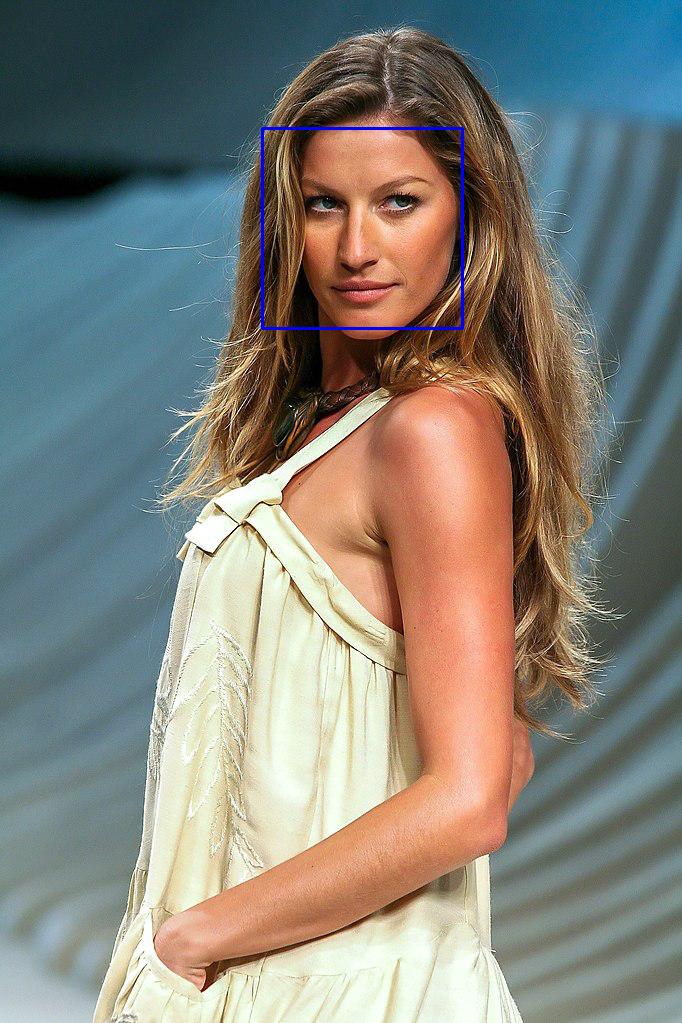

In [24]:
#2 Utilizando o código fonte das nossas aulas como base, carregue uma imagem contendo pelo menos uma face (pode ser a imagem carregada no item 1), 
#depois carregue o modelo de detecção de faces utilizado nas nossas aulas anteriores. 
#Construa um código de detecção de faces, encontre a caixa envolvente da face na imagem. 
#Pinte o retângulo ao redor da(s) face(s) encontrada(s) e exiba a imagem pintada na tela. Documente as funções utilizadas no código.

#Carregando modelo de detecção de faces treinado:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')


#Executa a detecção das faces na imagem_escalaDeCinza:
faces = face_cascade.detectMultiScale(imagem_escalaDeCinza, scaleFactor = 1.01, minNeighbors = 100, minSize = (20,20), flags = cv.CASCADE_SCALE_IMAGE)


# Desenha retangulos na imagem original (colorida) para cada face encontrada:
for (x,y,w,h) in faces:
     cv.rectangle(image_2,(x,y),(x+w,y+h),(255,0,0),2)

cv2_imshow(image_2)


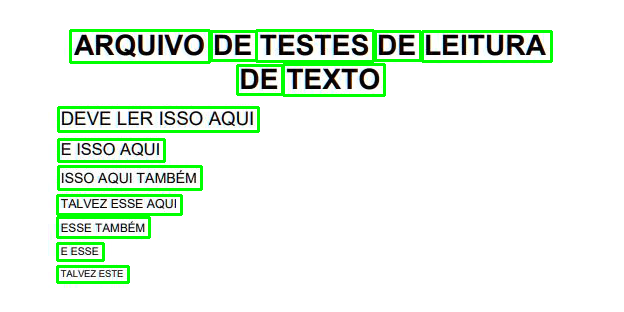

In [25]:
#3 Carregue uma imagem que contenha uma página de texto de um documento digitalizado de sua preferência. Uma vez carregada a imagem,
# utilize o OCR com o qual trabalhamos na nossa última aula (Tesseract), 
#reconheça o texto, e imprima o texto reconhecido na tela. Documente as funções utilizadas no código.


#Pegando as imagens
readingImage = io.imread("textoTeste.JPG")
#ImagemDeTeste = 'ImagemComTextoTeste.JPG'

#transforma para escala de cinza
imagemEmEscalaDeCinza = cv.cvtColor(readingImage, cv.COLOR_BGR2GRAY)

#Configurando para detecção de palavras:
ret, thresh1 = cv.threshold(imagemEmEscalaDeCinza, 0, 255, cv.THRESH_OTSU | cv.THRESH_BINARY_INV)

#Especificando a estrutura da detecção:
rect_kernel = cv.getStructuringElement(cv.MORPH_RECT, (10, 10))

#Dilatando a imagem
dilation = cv.dilate(thresh1, rect_kernel, iterations = 1)

#Pegando os contornos das palavras:
contours, hierarchy = cv.findContours(dilation, cv.RETR_EXTERNAL,
                                                 cv.CHAIN_APPROX_NONE)
img2 = readingImage.copy()

for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
     
    # Drawing a rectangle on image
    rect = cv.rectangle(img2, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img2)
